<a href="https://colab.research.google.com/github/ramendrasingla/data_analysis_tutorial/blob/main/Feature_Engineering_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from google.colab import drive
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import fetch_california_housing

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Part - 1

## Feature Engineering

* Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.

* Act of converting raw observations into desired features using statistical or machine learning approaches

* Produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy

### Checking Data Quality using Feature Engineering

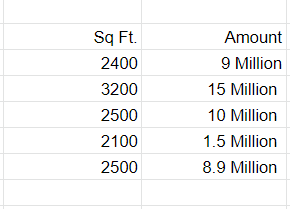

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/fe_eg_1_img_1.png')

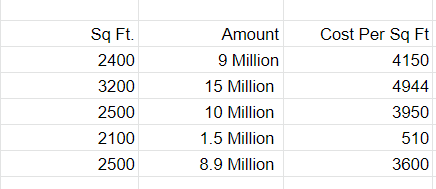

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/fe_eg_1_img_2.png')

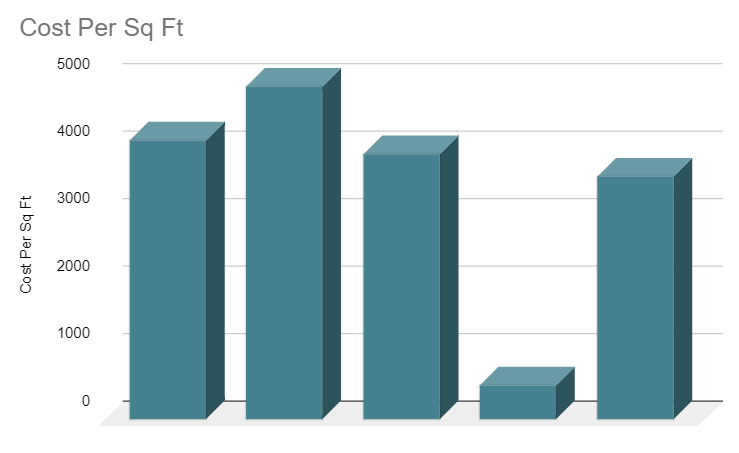

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/fe_eg_1_img_3.png')

### Processes in Feature Engineering

* **Feature Creation:** Creating features involves creating new variables which will be most helpful for our model. This can be adding or removing some features.
* **Transformations/ Feature Deletion:** Feature transformation is simply a function that transforms features from one representation to another. The goal here is to plot and visualise data, if something is not adding up with the new features we can reduce the number of features used, speed up training, or increase the accuracy of a certain model.
* **Feature Extraction:** Feature extraction is the process of extracting features from a data set to identify useful information. Without distorting the original relationships or significant information, this compresses the amount of data into manageable quantities for algorithms to process.
* **Exploratory Data Analysis:** Exploratory data analysis (EDA) is a powerful and simple tool that can be used to improve your understanding of your data, by exploring its properties. The technique is often applied when the goal is to create new hypotheses or find patterns in the data. It's often used on large amounts of qualitative or quantitative data that haven't been analyzed before.
* **Benchmark:** A Benchmark Model is the most user-friendly, dependable, transparent, and interpretable model against which you can measure your own. It's a good idea to run test datasets to see if your new machine learning model outperforms a recognised benchmark. These benchmarks are often used as measures for comparing the performance between different machine learning models like neural networks and support vector machines, linear and non-linear classifiers, or different approaches like bagging and boosting. To learn more about feature engineering steps and process, check the links provided at the end of this article. Now, let's have a look at why we need feature engineering in machine learning.

## Feature Engineering Techniques for ML

### Imputation:
> 1. Numerical Imputation
```
data = data.fillna(0)
```
> 2. Categorical Imputation
```
data[‘column_name’].fillna(data[‘column_name’].value_counts().idxmax(), inplace=True)
```
### Handling Outliers:
> 1. **Removal:** Outlier-containing entries are deleted from the distribution. However, if there are outliers across numerous variables, this strategy may result in a big chunk of the datasheet being missed.
> 2. **Replacing values:** Alternatively, the outliers could be handled as missing values and replaced with suitable imputation.
> 3. **Capping:** Using an arbitrary value or a value from a variable distribution to replace the maximum and minimum values.
> 4. **Discretization:** Discretization is the process of converting continuous variables, models, and functions into discrete ones. This is accomplished by constructing a series of continuous intervals (or bins) that span the range of our desired variable/model/function.
### One-hot encoding:
> A one-hot encoding is a type of encoding in which an element of a finite set is represented by the index in that set, where only one element has its index set to “1” and all other elements are assigned indices within the range (0, n-1). In contrast to binary encoding schemes, where each bit can represent 2 values (i.e. 0 and 1), this scheme assigns a unique value for each possible case.
### Log Transform:
> Log Transform is the most used technique among data scientists. It's mostly used to turn a skewed distribution into a normal or less-skewed distribution.
```
df['log_column'] = np.log(df[‘column’])
```
### Scaling:
> Distance-based algorithms like k-NN and k-Means, on the other hand, require scaled continuous features as model input. There are two common ways for scaling :
> 1. **Normalization**: All values are scaled in a specified range between 0 and 1 via normalisation (or min-max normalisation). This modification has no influence on the feature's distribution, however it does exacerbate the effects of outliers due to lower standard deviations. As a result, it is advised that outliers be dealt with prior to normalisation.

> 2. **Standardization**: Standardization (also known as z-score normalisation) is the process of scaling values while accounting for standard deviation. If the standard deviation of features differs, the range of those features will likewise differ. The effect of outliers in the characteristics is reduced as a result. To arrive at a distribution with a 0 mean and 1 variance, all the data points are subtracted by their mean and the result divided by the distribution's variance.

## Kaggle Use-Case
 
* [EDA](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)
* [Feature Engineering](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Feature_Engg.ipynb)

# Part - 2

## Preprocessing using sklearn

* Sklearn its preprocessing library forms a solid foundation to guide you through this important task in the data science pipeline.

### Missing Values


In [ ]:
df = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN])\
              .reshape((5,3)))
df.columns = ['f1', 'f2', 'f3']
print(df)

      f1   f2    f3
0    5.0  7.0   8.0
1    NaN  NaN   NaN
2   -5.0  0.0  25.0
3  999.0  1.0  -1.0
4    NaN  0.0   NaN


In [ ]:
# Drop NaN rows
df_drop = df.dropna(axis=0, thresh=1)
df_drop.reset_index(inplace=True)
df_drop.drop(['index'], axis=1, inplace=True)
print(df_drop)

In [ ]:
# Imputation
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df = df.replace({999.0: np.nan})
df_impute = imp.fit_transform(df)
# df_impute = df.fillna(df.mean(), inplace=True)
print(df_impute)

[[ 5.          7.          8.        ]
 [ 0.          2.         10.66666667]
 [-5.          0.         25.        ]
 [ 0.          1.         -1.        ]
 [ 0.          0.         10.66666667]]


### Polynomial Features

* Polynomial features are often created when we want to include the notion that there exists a nonlinear relationship between the features and the target.They are mostly used to add complexity to linear models with little features, or when we suspect the effect of one feature is dependent on another feature.

* If degree = 2, X = [x1, x2] => polynomaialss_X = [x1^2, x2^2, x1x2] => the only non-linear polynomial would be **x1x2**

In [ ]:
# Note: Impute First(no null values)
# degree 3: f1, f2, f3 -> f1*f2, f1*f3, f2*f3, f1*f2*f3
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=True)
df_polynomials = pd.DataFrame(poly\
                           .fit_transform(df_impute), 
                           columns=['0','1','2','3', 
                                    'p1', 'p2', 'p3', 'p4'])
print(df_polynomials)

     0    1    2          3    p1     p2         p3     p4
0  1.0  5.0  7.0   8.000000  35.0   40.0  56.000000  280.0
1  1.0  0.0  2.0  10.666667   0.0    0.0  21.333333    0.0
2  1.0 -5.0  0.0  25.000000  -0.0 -125.0   0.000000   -0.0
3  1.0  0.0  1.0  -1.000000   0.0   -0.0  -1.000000   -0.0
4  1.0  0.0  0.0  10.666667   0.0    0.0   0.000000    0.0


### Categorical Features

In [ ]:
X = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low',
              'F', 'B+', np.NaN])
              .reshape((5,3)))
X.columns = ['sex', 'blood_type', 'edu_level']
print(X.head())

  sex blood_type edu_level
0   M         O-    medium
1   M         O-      high
2   F         O+      high
3   F         AB       low
4   F         B+       nan


In [ ]:
X.edu_level.values.reshape(-1, 1)

array([['medium'],
       ['high'],
       ['high'],
       ['low'],
       ['nan']], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X.edu_level = encoder.fit_transform(X.edu_level.values.reshape(-1, 1))
print(X)

  sex blood_type  edu_level
0   M         O-        2.0
1   M         O-        0.0
2   F         O+        0.0
3   F         AB        1.0
4   F         B+        3.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(X[['sex', 'blood_type']])\
    .toarray(),
    columns=['F', 'M', 'AB', 'B+','O+', 'O-'])
nominals['edu_level'] = X.edu_level
print(nominals)

   F  M  AB  B+  O+  O-  edu_level
0  0  1   0   0   0   1        2.0
1  0  1   0   0   0   1        0.0
2  1  0   0   0   1   0        0.0
3  1  0   1   0   0   0        1.0
4  1  0   0   1   0   0        3.0


<ipython-input-21-64be83e6f97a>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onehot = OneHotEncoder(dtype=np.int, sparse=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Numerical Features

#### Discretization

* Discretization, also known as quantization or binning, divides a continuous feature into a pre-specified number of categories (bins), and thus makes the data discrete.

* The optional strategy parameter can be set to three values using KBinsDiscretizer:

> 1. uniform, where all bins in each feature have identical widths.
> 2. quantile (default), where all bins in each feature have the same number of points.
> 3. kmeans, where all values in each bin have the same nearest center of a 1D k-means cluster.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
X = pd.DataFrame([[-2, 1, -4,   -1],
      [-1, 2, -3, -0.5],
      [ 0, 3, -2,  0.5],
      [ 1, 4, -1,    2]])
X.columns = ['f1', 'f2', 'f3', 'f4']
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X)
Xt = est.transform(X)
print(Xt)

[[0. 0. 0. 0.]
 [1. 1. 1. 0.]
 [2. 2. 2. 1.]
 [2. 2. 2. 2.]]


#### Binarization

* Feature binarization is the process of tresholding numerical features to get boolean values. Or in other words, assign a boolean value (True or False) to each sample based on a threshold. Note that binarization is an extreme form of two-bin discretization.

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0, copy=True)
X_binary = binarizer.fit_transform(X)
print(X_binary)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 1.]]


### Scaling

#### Standardization

* Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation. After standardizing data the mean will be zero and the standard deviation one.

##### Standard Scaler

```
x_scaled = (x - u)/s
```



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.34164079, -1.34164079, -1.34164079, -1.09108945],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.65465367],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ,  0.21821789],
       [ 1.34164079,  1.34164079,  1.34164079,  1.52752523]])

##### Min-Max Scaler

```
x_scaled = (x - min(x))/(max(x) - min(x))
```



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit_transform(X)

array([[-3., -3., -3., -3.],
       [-1., -1., -1., -2.],
       [ 1.,  1.,  1.,  0.],
       [ 3.,  3.,  3.,  3.]])

##### MaxAbs Scaler

```
x_scaled = x/max(abs(x))
```



In [ ]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit_transform(X)

array([[-1.  ,  0.25, -1.  , -0.5 ],
       [-0.5 ,  0.5 , -0.75, -0.25],
       [ 0.  ,  0.75, -0.5 ,  0.25],
       [ 0.5 ,  1.  , -0.25,  1.  ]])

##### Robust Scaler
* If your data contains many outliers, scaling using the mean and standard deviation of the data is likely to not work very well. In these cases, you can use the RobustScaler. It removes the median and scales the data according to the quantile range

```
x_scaled = (x - Q1(x))/(Q3(x) - Q1(x))
```


In [ ]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
robust.fit_transform(X)

array([[-62.5       , -62.5       , -62.5       , -83.33333333],
       [-20.83333333, -20.83333333, -20.83333333, -41.66666667],
       [ 20.83333333,  20.83333333,  20.83333333,  41.66666667],
       [ 62.5       ,  62.5       ,  62.5       , 166.66666667]])

# Part - 3

## Feature Creation

* Feature creation is finding the most useful variables to be used in a predictive model. The process is subjective, and it requires human creativity and intervention. The new features are created by mixing existing features using addition, subtraction, and ration, and these new features have great flexibility.

### Feature Creation using Kaggle Use-Case
 
* [EDA](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)
* [Feature Engineering](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Feature_Engg.ipynb)
* Features to discuss - Merchandize, Country, URL

# Part - 4

## Feature Extraction

* Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features). These new reduced set of features should then be able to summarize most of the information contained in the original set of features.

* Another commonly used technique to reduce the number of feature in a dataset is Feature Selection. The difference between Feature Selection and Feature Extraction is that feature selection aims instead to rank the importance of the existing features in the dataset and discard less important ones (no new features are created).

* Common Feature Extraction Methods - Principal Component Analysis(PCA), Linear Discriminant Analysis(LDA) ---> to be discussed in future sessions 

[Reference Link](https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be)


### Advantages of Feature Extraction:

* Accuracy improvements.
* Overfitting risk reduction.
* Speed up in training.
* Improved Data Visualization.
* Increase in explainability of our model.

### Curse of Dimensionality

* Hughes (1968) in his study concluded that with a fixed number of training samples, the predictive power of any classifier first increases as the number of dimensions increase, but after a certain value of number of dimensions, the performance deteriorates. Thus, the phenomenon of curse of dimensionality is also known as Hughes phenomenon.

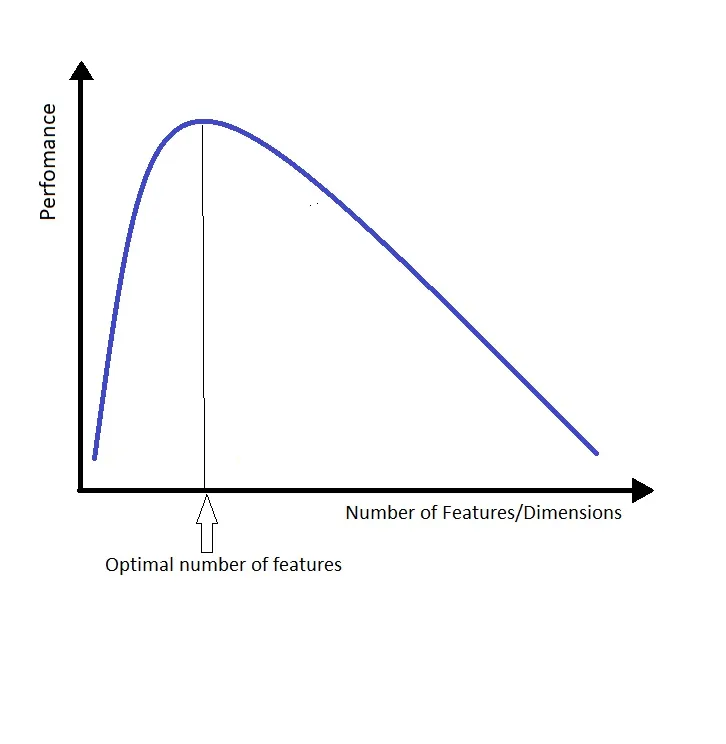

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/hughes_cod.png', height = 700)

#### Effect of Curse of Dimensionality on distance

* For any point A, lets assume the minimum distance between A and its nearest neighbor and the maximum distance between A and the farthest neighbor.

* That is, for a d — dimensional space, given n-random points, the min distance(A) ~ max distance(A) meaning, any given pair of points are equidistant to each other.

* Therefore, any machine learning algorithms which are based on the distance measure including KNN(k-Nearest Neighbor) tend to fail when the number of dimensions in the data is very high. Thus, dimensionality can be considered as a “curse” in such algorithms.

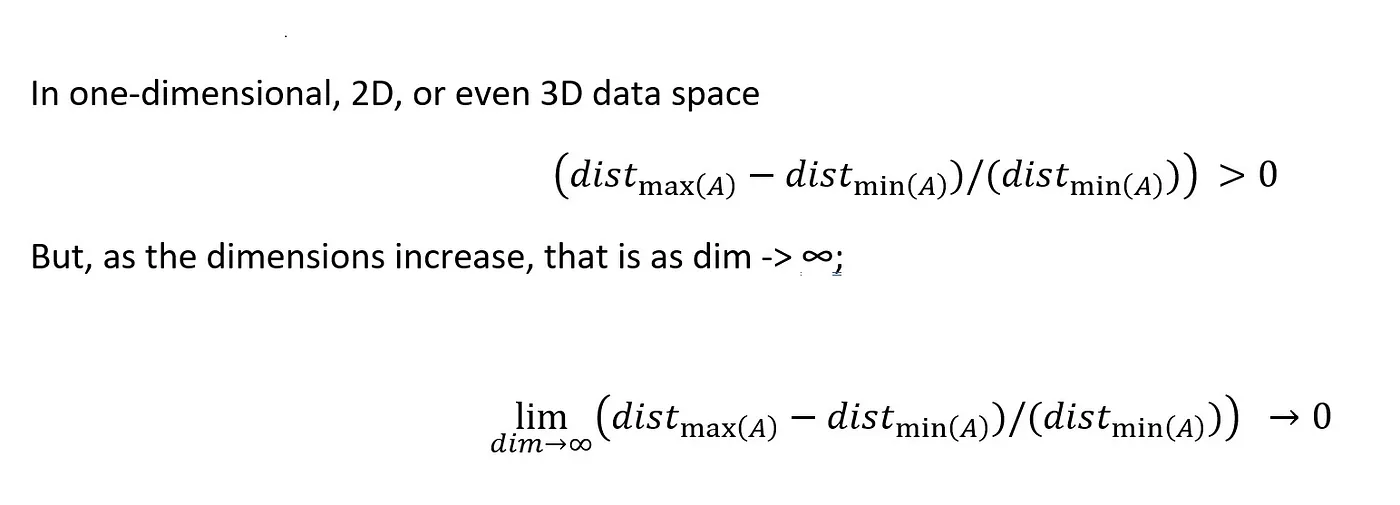

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/curse_of_dim_formula.png', width = 700)

### Response Encoding

* It is a technique to represent the categorical data while solving a machine learning classification problem. As part of this technique, we represent the probability of the data point belonging to a particular class given a category.

In [ ]:
df = pd.DataFrame( [['A', 0],
                    ['B', 1],
                    ['C', 1],
                    ['A', 1],
                    ['A', 1],
                    ['B', 1],
                    ['A', 0],
                    ['A', 0],
                    ['C', 1],
                    ['C', 0]])
df.columns = ['feature', 'prediction']
df

,feature,prediction
0,A,0
1,B,1
2,C,1
3,A,1
4,A,1
5,B,1
6,A,0
7,A,0
8,C,1
9,C,0


In [ ]:
df.groupby(['prediction', 'feature'])['prediction'].count()

prediction  feature
0           A          3
            C          1
1           A          2
            B          2
            C          2
Name: prediction, dtype: int64

In [ ]:
feature_response_encoded = ((df[df['prediction']==1]['feature'].value_counts()/df['feature'].value_counts())
                                                     .fillna(0).reset_index()
                                                     .rename(columns = {'index':'feature','feature':'feature_rE'}))
feature_response_encoded 

,feature,feature_rE
0,A,0.400000
1,B,1.000000
2,C,0.666667


In [ ]:
df_with_rE = feature_response_encoded.merge(df, on = 'feature',how = 'right')
df_with_rE

,feature,feature_rE,prediction
0,A,0.400000,0
1,B,1.000000,1
2,C,0.666667,1
3,A,0.400000,1
4,A,0.400000,1
5,B,1.000000,1
6,A,0.400000,0
7,A,0.400000,0
8,C,0.666667,1
9,C,0.666667,0


### Feature Creation using Kaggle Use-Case
 
* [EDA](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Business_Problem__EDA.ipynb)
* [Feature Engineering](https://github.com/ramendrasingla/Human-or-Robot/blob/main/Feature_Engg.ipynb)
* Features to discuss - Country, URL, Device, IP Address

# Part - 5

## Feature Transformation

### Standardization

In [ ]:
df = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
df['target'] = pd.Series(fetch_california_housing().target)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
population_data = df['Population']

pop_mean, pop_std = np.mean(population_data), np.std(population_data)
pop_cut_off = pop_std * 3
pop_lower, pop_upper = pop_mean - pop_cut_off, pop_mean + pop_cut_off
population_data_filtered = [x for x in population_data if x > pop_lower and x < pop_upper]

In [ ]:
print(len(population_data))
print(len(population_data_filtered))

20640
20298


(array([ 234.,  243.,  316.,  456.,  597.,  838., 1035., 1242., 1374.,
        1351., 1310., 1227., 1136., 1061.,  893.,  858.,  724.,  646.,
         572.,  516.,  429.,  397.,  279.,  299.,  217.,  206.,  192.,
         182.,  163.,  149.,  130.,  117.,  104.,  102.,   70.,   68.,
          77.,   59.,   56.,   57.,   56.,   31.,   33.,   34.,   22.,
          25.,   34.,   25.,   25.,   31.]),
 array([3.00000e+00, 9.93200e+01, 1.95640e+02, 2.91960e+02, 3.88280e+02,
        4.84600e+02, 5.80920e+02, 6.77240e+02, 7.73560e+02, 8.69880e+02,
        9.66200e+02, 1.06252e+03, 1.15884e+03, 1.25516e+03, 1.35148e+03,
        1.44780e+03, 1.54412e+03, 1.64044e+03, 1.73676e+03, 1.83308e+03,
        1.92940e+03, 2.02572e+03, 2.12204e+03, 2.21836e+03, 2.31468e+03,
        2.41100e+03, 2.50732e+03, 2.60364e+03, 2.69996e+03, 2.79628e+03,
        2.89260e+03, 2.98892e+03, 3.08524e+03, 3.18156e+03, 3.27788e+03,
        3.37420e+03, 3.47052e+03, 3.56684e+03, 3.66316e+03, 3.75948e+03,
        3.85580e

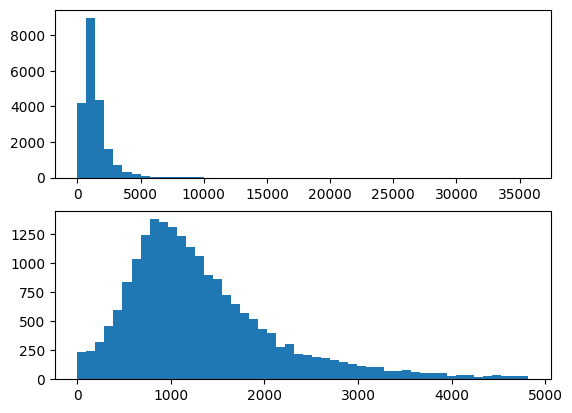

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(population_data, bins = 50)
ax[1].hist(population_data_filtered, bins = 50)

In [ ]:
income_data = df['MedInc']

inc_mean, inc_std = np.mean(income_data), np.std(income_data)
inc_cut_off = inc_std * 3
inc_lower, inc_upper = inc_mean - inc_cut_off, inc_mean + inc_cut_off
income_data_filtered = [x for x in income_data if x > inc_lower and x < inc_upper]

In [ ]:
print(len(income_data))
print(len(income_data_filtered))

20640
20295


(array([  25.,   52.,  105.,  183.,  261.,  375.,  629.,  616.,  761.,
         909.,  840., 1053.,  900.,  911., 1135.,  920.,  891.,  979.,
         742.,  880.,  807.,  612.,  629.,  560.,  460.,  549.,  439.,
         387.,  342.,  249.,  290.,  274.,  200.,  195.,  164.,  126.,
          91.,  109.,   86.,   92.,   95.,   71.,   70.,   57.,   45.,
          42.,   27.,   23.,   21.,   16.]),
 array([0.4999  , 0.681024, 0.862148, 1.043272, 1.224396, 1.40552 ,
        1.586644, 1.767768, 1.948892, 2.130016, 2.31114 , 2.492264,
        2.673388, 2.854512, 3.035636, 3.21676 , 3.397884, 3.579008,
        3.760132, 3.941256, 4.12238 , 4.303504, 4.484628, 4.665752,
        4.846876, 5.028   , 5.209124, 5.390248, 5.571372, 5.752496,
        5.93362 , 6.114744, 6.295868, 6.476992, 6.658116, 6.83924 ,
        7.020364, 7.201488, 7.382612, 7.563736, 7.74486 , 7.925984,
        8.107108, 8.288232, 8.469356, 8.65048 , 8.831604, 9.012728,
        9.193852, 9.374976, 9.5561  ]),
 <BarContainer o

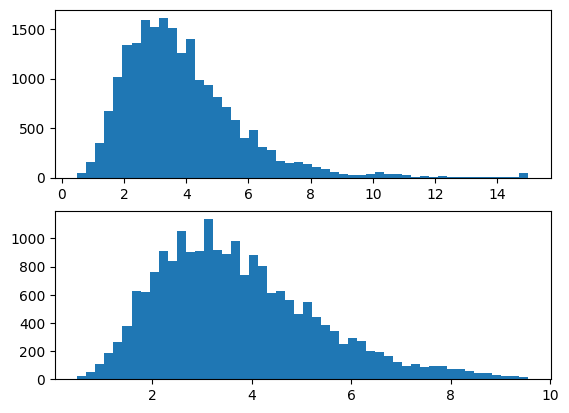

In [ ]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(income_data, bins = 50)
ax[1].hist(income_data_filtered, bins = 50)

#### Log Transformation

* Helps with skewness
* No predetermined range for scaled data
* Useful only on non-zero, non-negative data

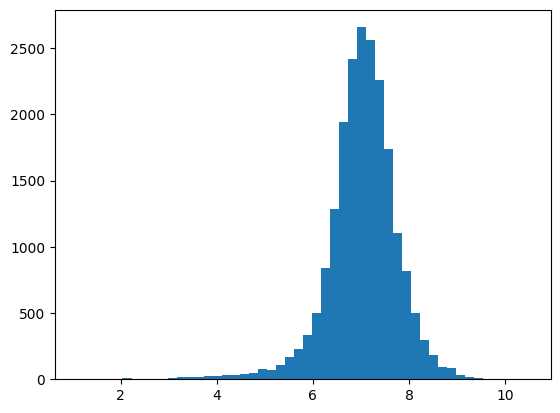

In [ ]:
log_population_data = np.log(population_data)
plt.hist(log_population_data, bins = 50)
plt.show()

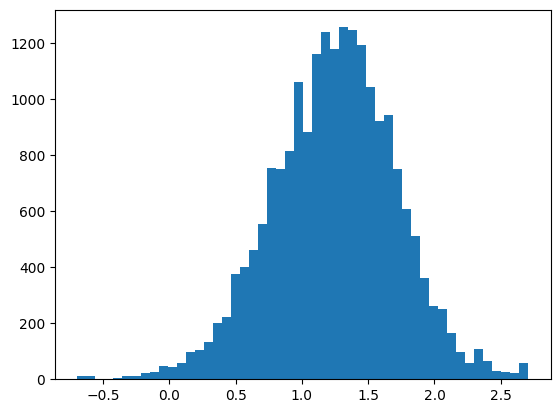

In [ ]:
log_income_data = np.log(income_data)
plt.hist(log_income_data, bins = 50)
plt.show()

#### Box-Cox Transformation

* Special Log Transformation
* Helps correct skewness
* No predetermined range
* Only be used on non-negative data
* [Understanding Box-Cox](https://www.geeksforgeeks.org/box-cox-transformation-using-python/)

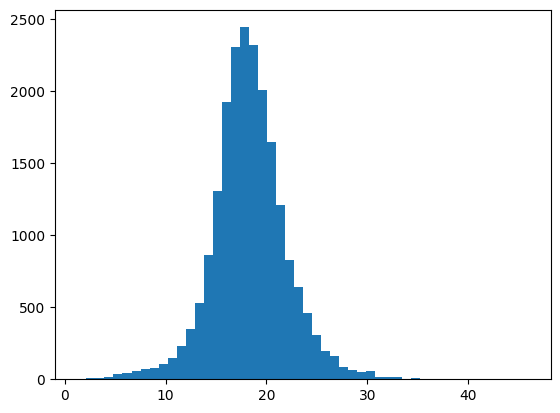

In [ ]:
from scipy import stats
box_cox_population_data, fitted_lambda = stats.boxcox(population_data)
plt.hist(box_cox_population_data, bins = 50)
plt.show()

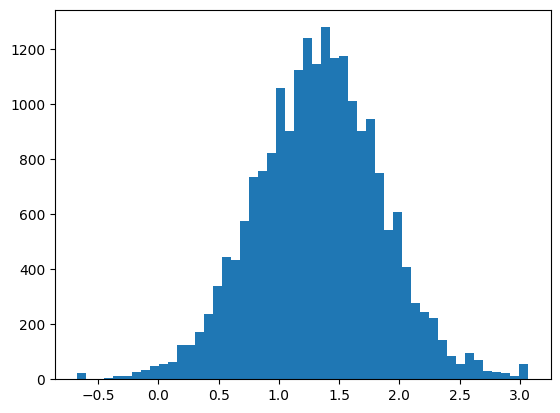

In [ ]:
box_cox_income_data, fitted_lambda = stats.boxcox(income_data)
plt.hist(box_cox_income_data, bins = 50)
plt.show()

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

#### Standard Scaling

* Shifts distribution's mean to 0 & unit variance
* No predetermined range
* Best to use on data that is approximately normally distributed

In [ ]:
scale = StandardScaler()

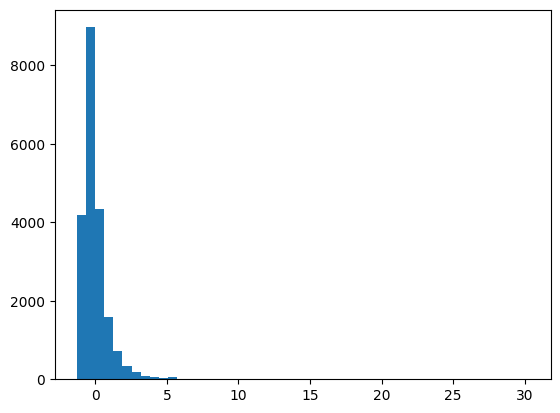

In [ ]:
scale_population_data = scale.fit_transform(np.array(population_data).reshape(-1,1))
plt.hist(scale_population_data.flatten(), bins = 50)
plt.show()

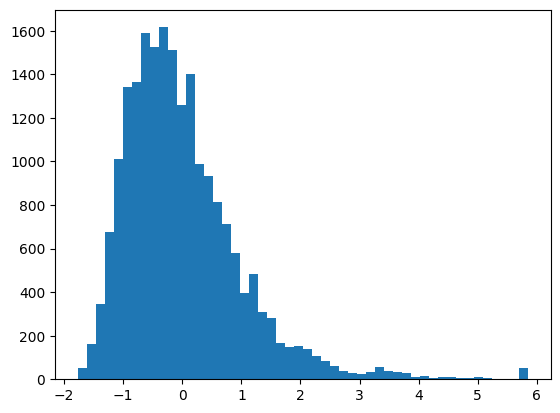

In [ ]:
scale_income_data= scale.fit_transform(np.array(income_data).reshape(-1,1))
plt.hist(scale_income_data.flatten(), bins = 50)
plt.show()

#### Min-Max Scaling

* Rescales to predetermined range(0-1)
* Doesn't change distribution's center (doesn't correct skewness)
* Sensitive to outliers

In [ ]:
scale = MinMaxScaler()

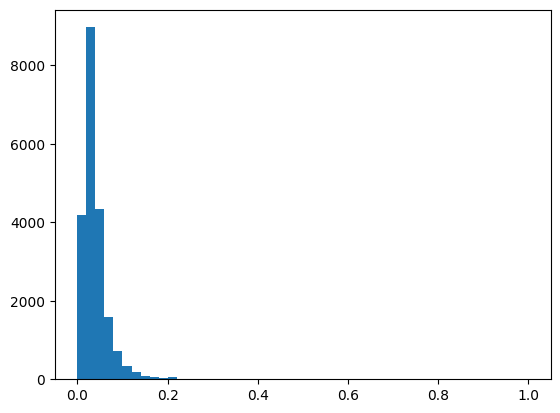

In [ ]:
scale_population_data = scale.fit_transform(np.array(population_data).reshape(-1,1))
plt.hist(scale_population_data.flatten(), bins = 50)
plt.show()

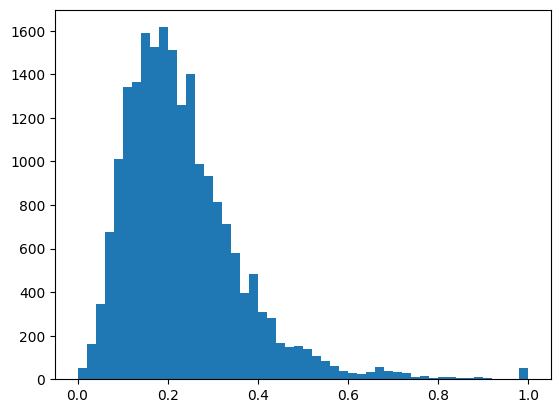

In [ ]:
scale_income_data= scale.fit_transform(np.array(income_data).reshape(-1,1))
plt.hist(scale_income_data.flatten(), bins = 50)
plt.show()

#### Maximum Absolute Scaling

* Rescales to predetermined range (-1 to 1)
* Doesn't change distribution's center
* Sensitive to outliers

In [ ]:
scale = MaxAbsScaler()

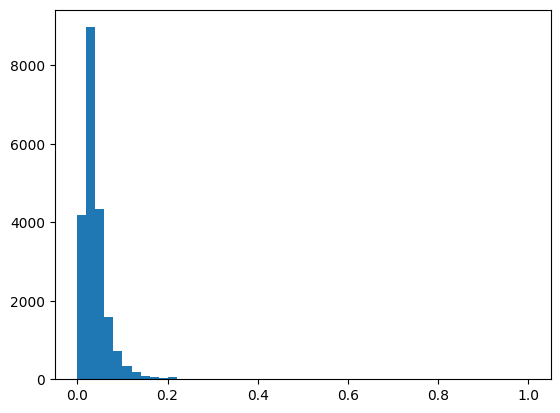

In [ ]:
scale_population_data = scale.fit_transform(np.array(population_data).reshape(-1,1))
plt.hist(scale_population_data.flatten(), bins = 50)
plt.show()

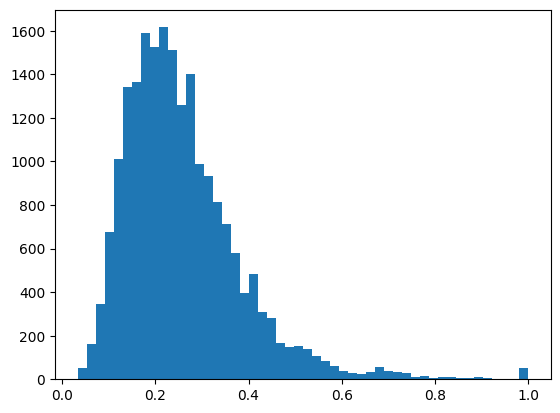

In [ ]:
scale_income_data= scale.fit_transform(np.array(income_data).reshape(-1,1))
plt.hist(scale_income_data.flatten(), bins = 50)
plt.show()

#### Robust Scaling

* 0 mean & unit variance
* Use of quartile ranges makes this less sensitive to (a few) outliers
* No predetermined range

In [ ]:
scale = RobustScaler()

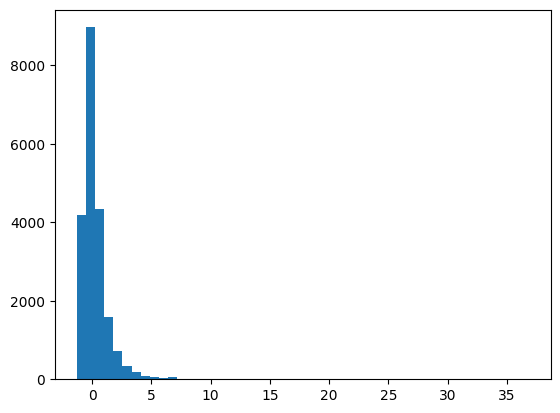

In [ ]:
scale_population_data = scale.fit_transform(np.array(population_data).reshape(-1,1))
plt.hist(scale_population_data.flatten(), bins = 50)
plt.show()

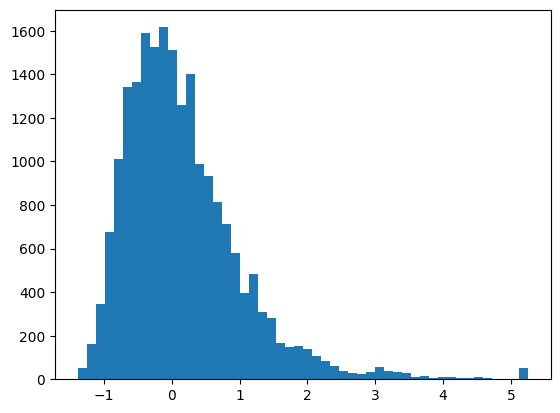

In [ ]:
scale_income_data= scale.fit_transform(np.array(income_data).reshape(-1,1))
plt.hist(scale_income_data.flatten(), bins = 50)
plt.show()

## Data Encoding Methods

### Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data = pd.DataFrame({
    'city' : ['delhi', 'hyderabad', 'delhi', 'delhi', 'gurgaon', 'hyderabad']
})

encoder.fit_transform(data)

array([[0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.]])

### One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(dtype=np.int, sparse=True)
pd.DataFrame(encoder.fit_transform(data).toarray(), columns=['delhi', 'gurgaon', 'hyderabad'])

<ipython-input-81-584d02d147cf>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  encoder = OneHotEncoder(dtype=np.int, sparse=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,delhi,gurgaon,hyderabad
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0
5,0,0,1


### Binary Encoding

* The categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns.
* Lesser number of columns in compared to one-hot

In [ ]:
# pip install category-encoders
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = ['class'])
data = pd.DataFrame({
 'class' : ['a', 'b', 'a', 'b', 'd', 'e', 'd', 'f', 'g', 'h', 'h', 'k', 'h', 'i', 's', 'p', 'z']})
encoder.fit_transform(data)

,class_0,class_1,class_2,class_3
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,1
5,0,1,0,0
6,0,0,1,1
7,0,1,0,1
8,0,1,1,0
9,0,1,1,1


### BaseN Encoding

* In binary encoding, we convert the integers into binary i.e base 2. BaseN allows us to convert the integers with any value of the base.

In [ ]:
import category_encoders as ce
data = pd.DataFrame({
 'class' : ['a', 'b', 'a', 'b', 'd', 'e', 'd', 'f', 'g', 'h', 'h', 'k', 'h', 'i', 's', 'p', 'z']})


# ## Base 4 encoding
# ce_baseN4 = ce.BaseNEncoder(cols=['class'],base=4)
# ce_baseN4.fit_transform(data)

## Base 3 encoding
ce_baseN3 = ce.BaseNEncoder(cols=['class'],base=3)
ce_baseN3.fit_transform(data)

,class_0,class_1,class_2
0,0,0,1
1,0,0,2
2,0,0,1
3,0,0,2
4,0,1,0
5,0,1,1
6,0,1,0
7,0,1,2
8,0,2,0
9,0,2,1


### Hash Encoding

* Hash Encoding represents the categorical data into numerical value by the hashing function. Hashing is often used in data encryption or data comparison, but the main part is still similar — transform one feature to another using hashing function.

* [Link](https://computersciencewiki.org/index.php/Hashing)

In [ ]:
data = pd.DataFrame({
    'color' : ['Yellow', 'Black', 'Green', 'Blue', 'Blue', 'Green', 'Black', 'Blue']
})

ce_HE = ce.HashingEncoder(cols=['color'],n_components=5)
ce_HE.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,0,0,0,1,0
7,0,0,0,1,0


### Target Encoding

* Similar in concept to Response Encoding

In [ ]:
data = pd.DataFrame({
    'color' : ['Blue', 'Black', 'Black','Blue', 'Blue'],
    'outcome' : [1,      2,        1,     1,      2,]
})

X = data['color']
Y = data['outcome']

ce_TE = ce.TargetEncoder(cols=['color'])

ce_TE.fit(X,Y)
ce_TE.transform(X)

,color
0,1.389702
1,1.414185
2,1.414185
3,1.389702
4,1.389702


In [ ]:
test_data = pd.DataFrame({
    'color' : ['Blue', 'Black', 'Black'],
})
ce_TE.transform(test_data)

,color
0,1.389702
1,1.414185
2,1.414185


# Part - 6

## Feature Selection

* It is a process of automatically or manually selecting the subset of most appropriate and relevant features to be used in model building." Feature selection is performed by either including the important features or excluding the irrelevant features in the dataset without changing them.

### Filter-based method

* The features are selected independently of any machine learning algorithms. Using statistics (e.g., Pearson's Correlation, LDA, etc.), we select important features based on how each feature impacts the target outcome. This is the least compute-intensive and fastest methodology.

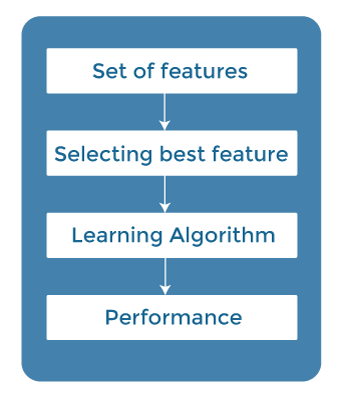

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_filter.png')

#### Correlation

* Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

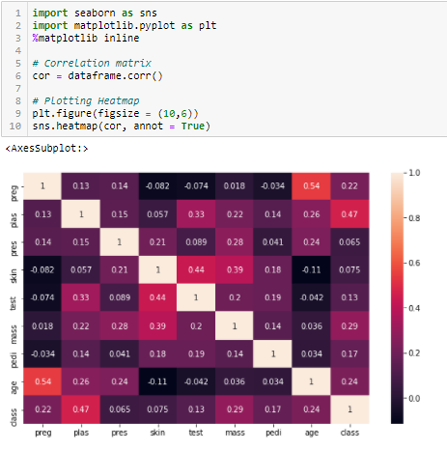

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_corr.png')

#### Chi-Square Test

* The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores.

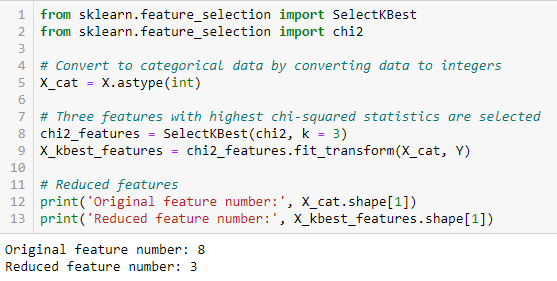

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_chi_square.png')

### Wrapper Method

* This method selects the features based on ML training metric results. Each subset gets a score after training, then we add or remove features and eventually stop when we achieve the desired ML metric threshold. This could be forward, backward or recursive selection. This is the most compute-intensive method since you need to train many ML models.

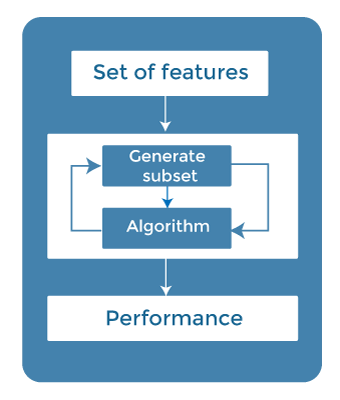

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_wrapper.png')

#### Step Forward Selection

* Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

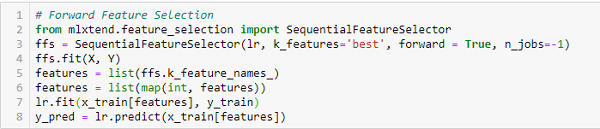

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_sfs.png')

#### Backward Feature Selection/Elimination

* In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features

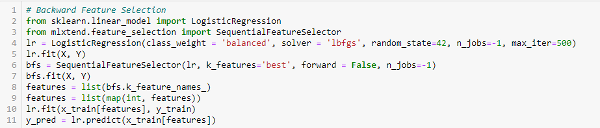

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_bfs.png')

#### Recursive Feature Elimination

* It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

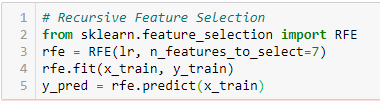

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_rfe.png')

### Embedded method
* This method is more complex and combines filtered and wrapper methodologies together. The most popular examples of this method are LASSO and a tree algorithm.
* **LASSO:**Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e., to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each predictor. From the different types of regularization, Lasso or L1 has the property that can shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

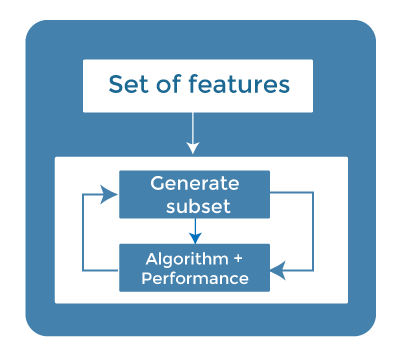

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_embedded.png')

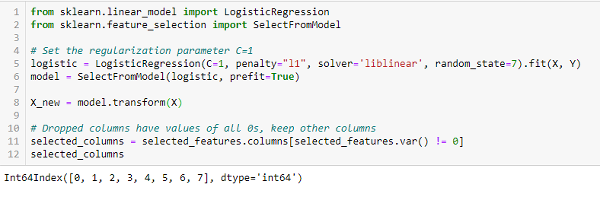

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/feature_selection_lasso.png')

# Part - 7

## Principal Component Analysis(PCA)

* PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.



### Understanding PCA:

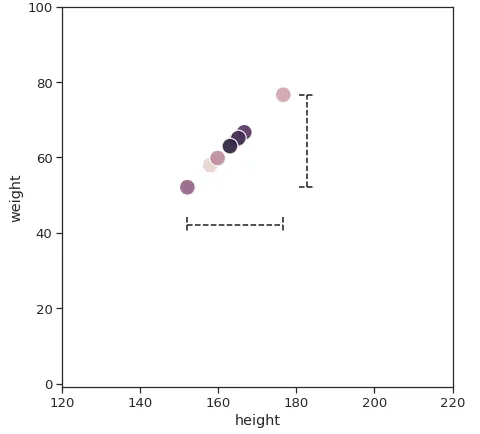

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/pca_eg_1.png')

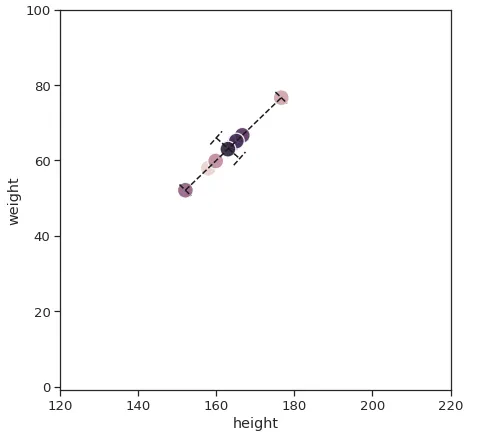

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/pca_eg_2.png')

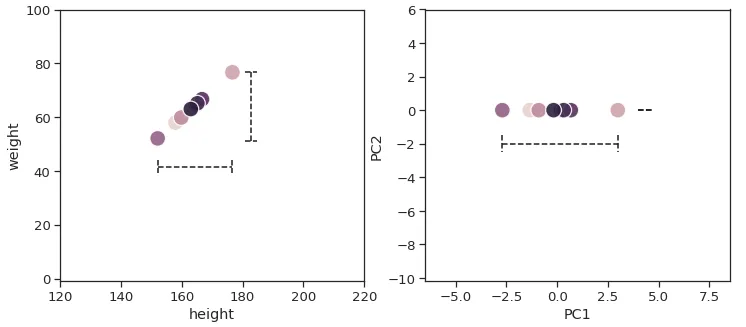

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/pca_eg_3.png')

#### Discussing Information Loss in PCA

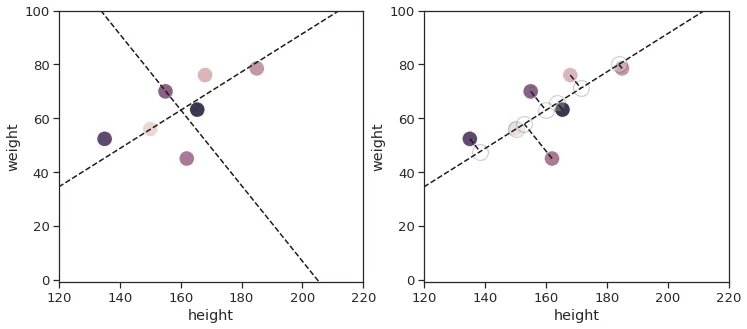

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/pca_eg2_1.png')

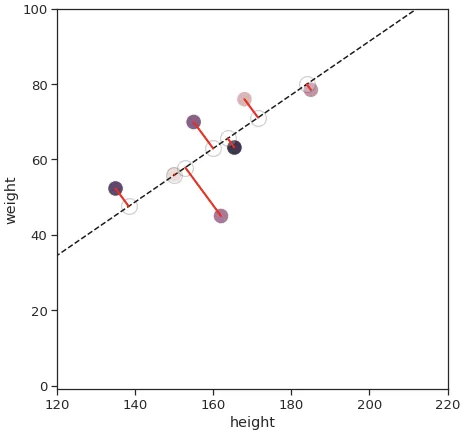

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/pca_eg2_2.png')

### How does PCA work:

1. Calculate the covariance matrix X of data points.
2. Calculate eigen vectors and corresponding eigen values.
3. Sort the eigen vectors according to their eigen values in decreasing order.
4. Choose first k eigen vectors and that will be the new k dimensions.
5. Transform the original n dimensional data points into k dimensions.

[**PCA Math Reference Link**](https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643#:~:text=Introduction,present%20in%20the%20data%20set)

#### Covariance:

* Measure that describes the relationship between variables. In variance, you cannot get the relationship since you are just using one variable.

* Covariance Matrix — this is a square matrix that shows the variance of variables and the covariance between a pair of variables in a dataset. If we have variables X, Y, and Z with their values as shown below then we would first calculate the variance of X, Y, and Z which is 80.3, 33.037, and 142.5 respectively.

#### Eigen Decomposition

* Eigen decomposition which is simply the process of producing eigenvalues and eigenvectors. Often an eigenvalue is found first, then an eigenvector is found to help us get principal components(new variables we get as a result of as the combinations or mixture of the initial variables)

```
[Covariance Matrix]*[Eigen Vector] = [Eigen Value]*[Eigen Vector]
```

### Scikit-learn execution of PCA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

In [ ]:
data = load_wine()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
x = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components = 4)
pca_df = pd.DataFrame(pca.fit_transform(x))
print(pca.explained_variance_ratio_)
pca_df.head()

[0.36198848 0.1920749  0.11123631 0.0706903 ]


,0,1,2,3
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766


## Linear Discriminant Analysis(LDA)

* Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning. It is a technique used to find a linear combination of features that best separates the classes in a dataset.
* LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of between-class variance to within-class variance. In other words, it finds the directions in the feature space that best separate the different classes of data.
* LDA assumes that the data has a Gaussian distribution and that the covariance matrices of the different classes are equal. 

[**LDA Math Reference Link**](https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b)

### Understanding LDA:

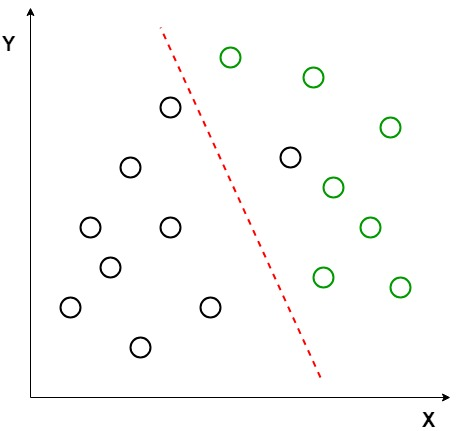

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/lda_eg_1.png')

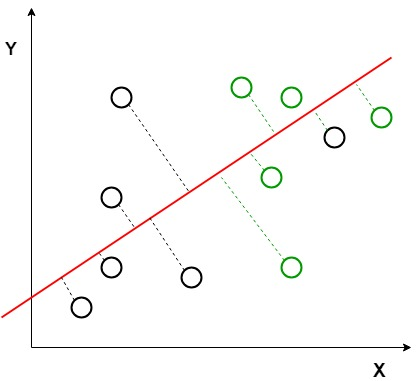

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/lda_eg_2.jpeg')

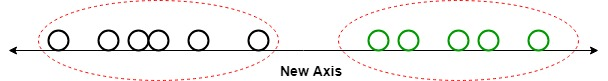

In [ ]:
Image(filename='/content/drive/MyDrive/Newton School/Feature Engineering/lda_eg_3.jpeg')

### Scikit-learn execution of LDA

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
data = load_wine()
X = data.data
y = data.target
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y)
lda_df = pd.DataFrame(lda.transform(X))
lda_df.head()

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224


## PCA vs LDA

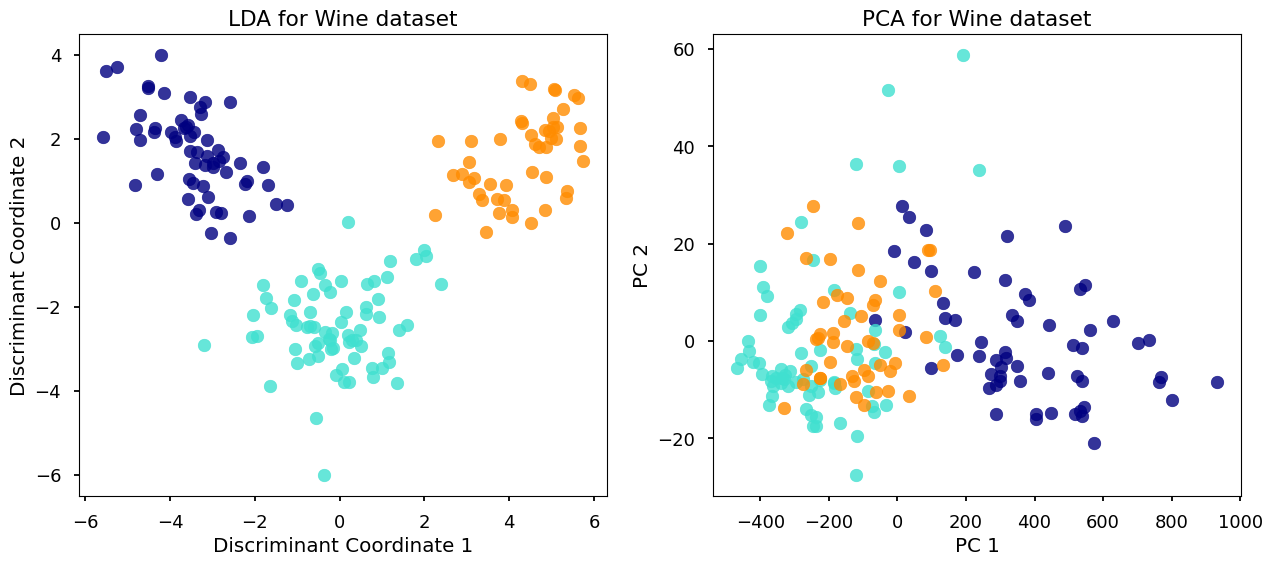

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
%matplotlib inline

wine = datasets.load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Wine dataset')
    axes[1].title.set_text('PCA for Wine dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')